In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# ĐỀ BÀI: Sử dụng dữ liệu “housing_data.csv” của một công ty định giá nhà. Biết dữ liệu có các cột sau: 
# · Size: Diện tích căn nhà (m2) 
# · Age: Tuổi cùa căn nhà (năm) 
# · Price: Giá bán của căn nhà (ngàn $) 
# Hãy: 
# 1. Xây dựng mô hình Linear Regression để dự đoán giá bán của căn nhà dựa trên hai yếu tố là Diện tích và Tuổi.
# 2. Đánh giá độ hiệu quả của mô hình bằng chỉ số R2.
# 3. Vẽ 02 biểu đồ Scatter Plot biểu diễn mối quan hệ giữa Diện tích và Tuổi với Giá nhà. Đánh giá yếu tố nào biểu thị mối tương quan rõ rệt hơn.

In [59]:
#1
df = pd.read_csv("housing_data.csv")
df.head()

,Size,Age,Price
0,152,7,513.572460
1,398,34,1224.324769
2,320,34,981.373408
3,156,32,416.370691
4,121,4,418.617384


In [60]:
x = df.iloc[:, [0,1]]
y = df.iloc[:, [2]]
x.columns, y.columns

(Index(['Size', 'Age'], dtype='object'), Index(['Price'], dtype='object'))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80, 2) (80, 1)
(20, 2) (20, 1)


In [33]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
y_pred = model.predict(x_train)

In [35]:
mse = mean_squared_error(y_train, y_pred)
mse

2178.5548241452243

In [36]:
# 2
r2 = r2_score(y_train, y_pred)
r2

0.985340324871627

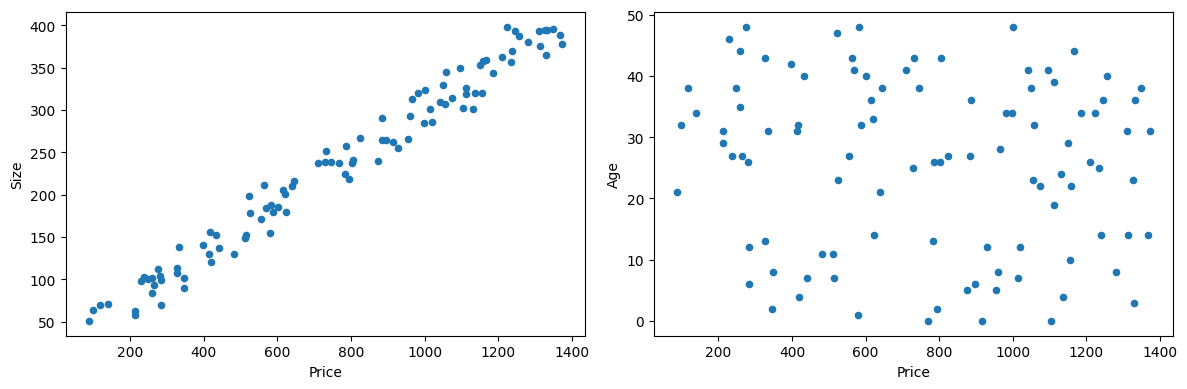

In [61]:
# 3
figure, axes = plt.subplots(1, 2, figsize=[12, 4])
df.plot.scatter(
    x = "Price",
    y = "Size",
    ax = axes[0]
)
df.plot.scatter(
    x = "Price",
    y = "Age",
    ax = axes[1]
)

plt.tight_layout()
plt.show()

In [68]:
new_model = LinearRegression()
x1 = df.iloc[:, [2]]
y1 = df.iloc[:, [0,1]]

new_model.fit(x1, y1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
new_model.predict(pd.DataFrame([3000]))

c:\Users\pc\OneDrive\Desktop\CSA15\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[850.01509376,  15.72451663]])

In [72]:
d1 = df["Price"].corr(df["Size"])
d1

np.float64(0.9872047225790234)

In [73]:
d2 = df["Price"].corr(df["Age"])
d2

np.float64(-0.11811285583338105)

In [74]:
if d1 > d2:
    print(d1)
else:
    print(d2)

0.9872047225790234
